In [47]:

# https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html
# Srouces
# https://docs.opencv.org/3.4/d5/d6f/tutorial_feature_flann_matcher.html

# AIGS1010 - Camputer vision, week 6 demo:
    # https://loyalistcollege.instructure.com/courses/10557/pages/demo-resources?module_item_id=619758
# https://www.geeksforgeeks.org/python-grayscaling-of-images-using-opencv/

The following part of the program is the first training part.
It is designed to demonstrate the program implementation by showing the faces and the common keypoints.

In this part, we make use of OpenCV (Open Source Computer Vision Library). This is an open-source library that includes several hundreds of computer vision algorithms.

Step 1: In this part, we load the relevant modules from cv2.
Step 2: In the training part, we will select a folder from our database and put the path to it under "image_dir",
        and save them as a list of paths in the image_files variable.
Step 3: At this stage, we use 2 for loops with the variables "i" and "j" to compare each face in our directory to every
        other one, and find common keypoints.
Step 3.1: In this step, we print the results to the console using "matplotlib", a Python library used for visualization.


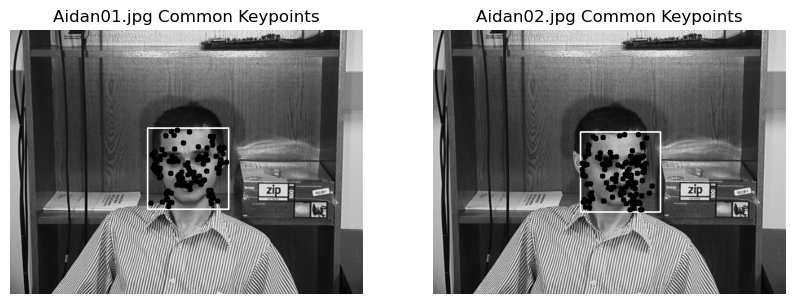

Number of common keypoints in Aidan01.jpg : 135
Number of common keypoints in Aidan02.jpg : 140


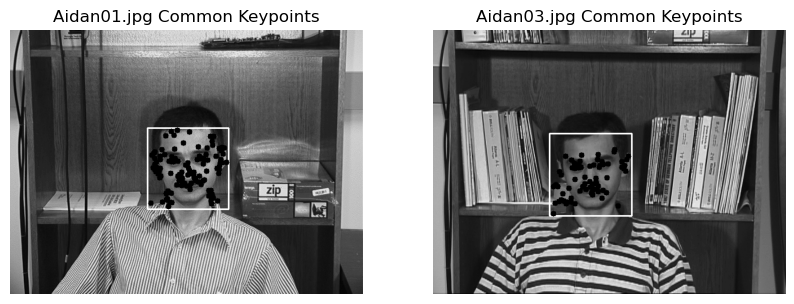

Number of common keypoints in Aidan01.jpg : 135
Number of common keypoints in Aidan03.jpg : 81


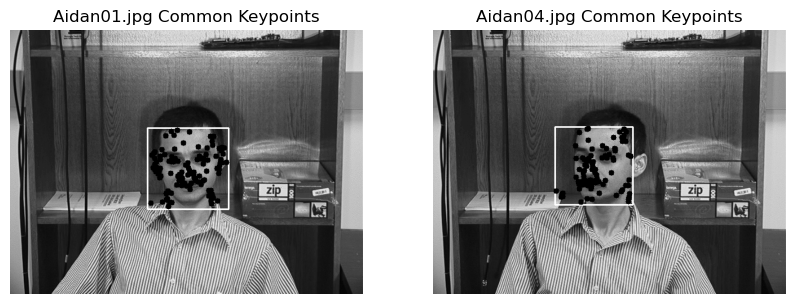

Number of common keypoints in Aidan01.jpg : 135
Number of common keypoints in Aidan04.jpg : 92


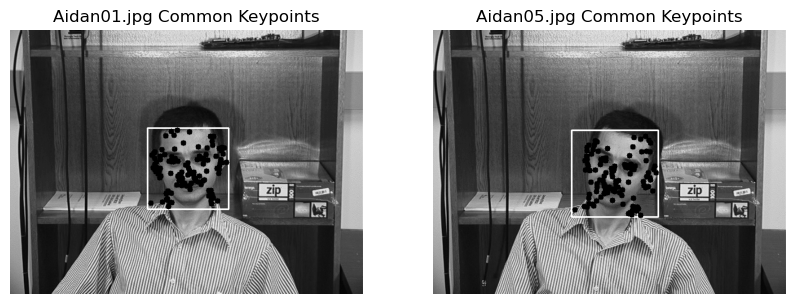

Number of common keypoints in Aidan01.jpg : 135
Number of common keypoints in Aidan05.jpg : 136


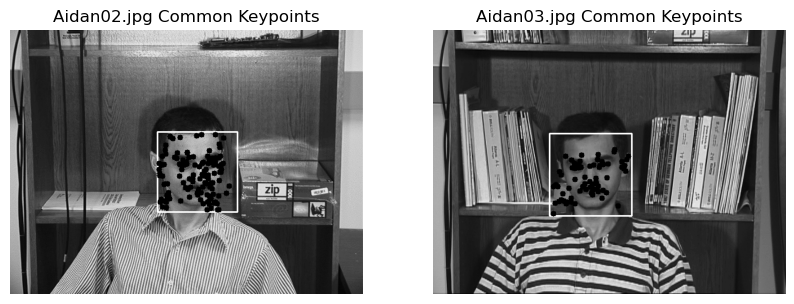

Number of common keypoints in Aidan02.jpg : 140
Number of common keypoints in Aidan03.jpg : 81


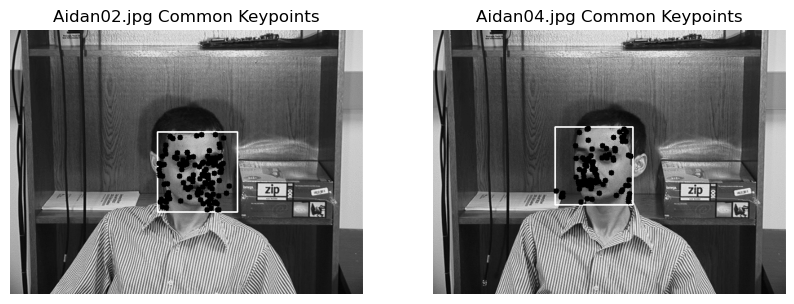

Number of common keypoints in Aidan02.jpg : 140
Number of common keypoints in Aidan04.jpg : 92


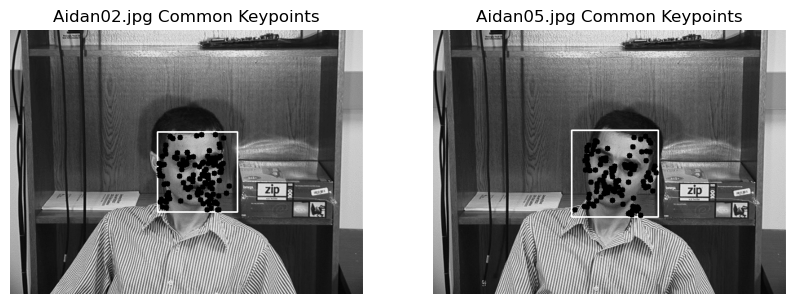

Number of common keypoints in Aidan02.jpg : 140
Number of common keypoints in Aidan05.jpg : 136


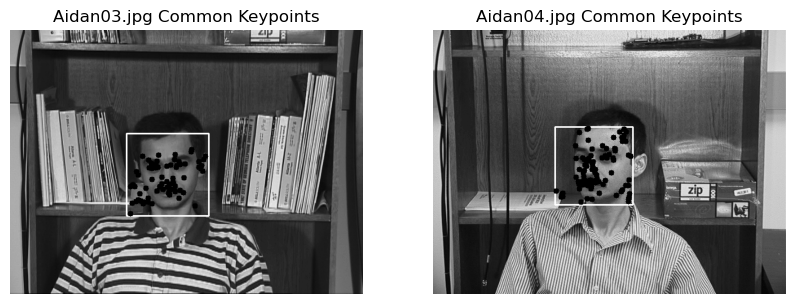

Number of common keypoints in Aidan03.jpg : 81
Number of common keypoints in Aidan04.jpg : 92


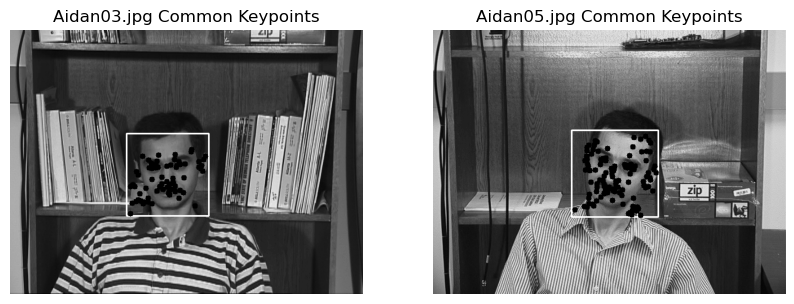

Number of common keypoints in Aidan03.jpg : 81
Number of common keypoints in Aidan05.jpg : 136


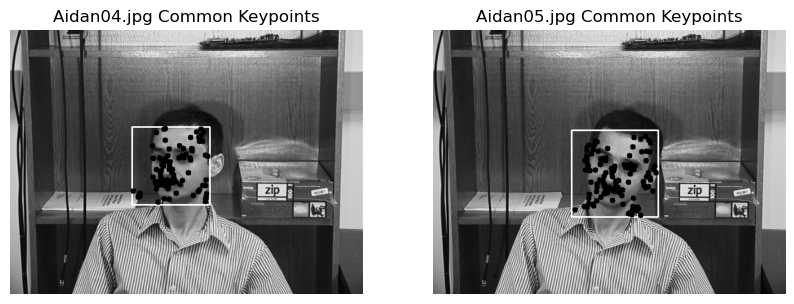

Number of common keypoints in Aidan04.jpg : 92
Number of common keypoints in Aidan05.jpg : 136


In [48]:
### training 1 ###
# This part is for demostraiting the program by showing the faces and the commen key points


import cv2
import os
from matplotlib import pyplot as plt

# step 1:
# Load the pre-trained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Initialize SIFT
sift = cv2.SIFT_create()


##################################################################################
# step 2:
# Path to the directory containing the images to be used for trauning and testing

image_dir = r"C:\Users\Ilan\Desktop\Face recognition\gt_db\gt_database 1\gt_database 1\gt_db\Aidan"


# Get a list of all image filenames in the directory 
image_files = [file for file in os.listdir(image_dir) if file.endswith('.jpg')]

#################################################################################
#step 3:
# https://www.geeksforgeeks.org/python-grayscaling-of-images-using-opencv/

for i in range(len(image_files)): # all the images in the directory
    for j in range(i+1, len(image_files)): # i and j will be used to compair the pictures to each other
        # Read the images
        img1 = cv2.imread(os.path.join(image_dir, image_files[i]), cv2.IMREAD_GRAYSCALE)
        img2 = cv2.imread(os.path.join(image_dir, image_files[j]), cv2.IMREAD_GRAYSCALE)
        
        # Detect the faces in all of the pictures
        faces1 = face_cascade.detectMultiScale(img1, scaleFactor=1.1, minNeighbors=5)
        faces2 = face_cascade.detectMultiScale(img2, scaleFactor=1.1, minNeighbors=5)
        
        # Initialize lists to store common keypoints
        common_kp1 = []
        common_kp2 = []
        
        # https://www.geeksforgeeks.org/python-grayscaling-of-images-using-opencv/
        # Extract keypoints and descriptors only within the detected faces
        for (x, y, w, h) in faces1:
            face_roi = img1[y:y+h, x:x+w]
            kp1, des1 = sift.detectAndCompute(face_roi, None)
            common_kp1.extend(kp1)
            cv2.rectangle(img1, (x, y), (x+w, y+h), (255, 0, 0), 2)
            for kp in common_kp1:
                cv2.circle(img1, (int(kp.pt[0]) + x, int(kp.pt[1]) + y), 5, (0, 255, 0), -1)
        
        for (x, y, w, h) in faces2:
            face_roi = img2[y:y+h, x:x+w]
            kp2, des2 = sift.detectAndCompute(face_roi, None)
            common_kp2.extend(kp2)
            cv2.rectangle(img2, (x, y), (x+w, y+h), (255, 0, 0), 2)
            for kp in common_kp2:
                cv2.circle(img2, (int(kp.pt[0]) + x, int(kp.pt[1]) + y), 5, (0, 255, 0), -1)

#################################################################################
# step 3.1
        # Display the images with faces and common keypoints
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(img1, cmap='gray')
        axes[0].set_title(f'{image_files[i]} Common Keypoints')
        axes[0].axis('off')

        axes[1].imshow(img2, cmap='gray')
        axes[1].set_title(f'{image_files[j]} Common Keypoints')
        axes[1].axis('off')

        plt.show()

        # Compare the number of common keypoints in both faces
        print("Number of common keypoints in", image_files[i], ":", len(common_kp1))
        print("Number of common keypoints in", image_files[j], ":", len(common_kp2))


This is the second training part.
In this part, we go through the same process as in the first training part and then calculate a numerical value for the similarity of all faces from our training directory to all of the other faces in the directory. This gives us an average of all common keypoints in the training faces.
Mathematically, it is:

sum((x/y)+(y/x))/n

where:
x and y are represents the common keypoints for every pair of faces,
n is the number of faces.

The first lines of code are identical to parts 1 and 2 from the first training part.
The last part of the code is a calculator that will extract the value we get for the real person.


In [49]:
### Training 2 ###
# A calculator for the average ratio of common points between all training faces

import cv2
import os
import numpy as np

# Load the pre-trained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Initialize SIFT
sift = cv2.SIFT_create()

###########
# Path to the directory containing the images
image_dir = r"C:\Users\Ilan\Desktop\Face recognition\gt_db\gt_database 1\gt_database 1\gt_db\Aidan"
###########

# Get a list of all image filenames in the directory
image_files = [file for file in os.listdir(image_dir) if file.endswith('.jpg')]

# Initialize a list to store the average number of common keypoints for each pair of images
average_common_keypoints = []

# Iterate over each pair of images
for i in range(len(image_files)):
    for j in range(i+1, len(image_files)):
        # Read the images
        img1 = cv2.imread(os.path.join(image_dir, image_files[i]), cv2.IMREAD_GRAYSCALE)
        img2 = cv2.imread(os.path.join(image_dir, image_files[j]), cv2.IMREAD_GRAYSCALE)
        
        # Detect faces in the images
        faces1 = face_cascade.detectMultiScale(img1, scaleFactor=1.1, minNeighbors=5)
        faces2 = face_cascade.detectMultiScale(img2, scaleFactor=1.1, minNeighbors=5)
        
        # Initialize lists to store common keypoints
        common_kp1 = []
        common_kp2 = []
        
        # Extract keypoints and descriptors only within the detected faces
        for (x, y, w, h) in faces1:
            face_roi = img1[y:y+h, x:x+w]
            kp1, des1 = sift.detectAndCompute(face_roi, None)
            common_kp1.extend(kp1)
        
        for (x, y, w, h) in faces2:
            face_roi = img2[y:y+h, x:x+w]
            kp2, des2 = sift.detectAndCompute(face_roi, None)
            common_kp2.extend(kp2)
        
        # Calculate the average number of common keypoints for this pair of images
        average_keypoints = ((len(common_kp1) / len(common_kp2)) + (len(common_kp2) / len(common_kp1))) / 2
        average_common_keypoints.append(average_keypoints)

# Calculate the average value of each pair of pictures divided by the other
average_value_real = sum(average_common_keypoints) / len(average_common_keypoints)
print("Average value of common keypoints:", average_value_real)


Average value of common keypoints: 1.067458738728986


This is the testing part. This part simulates a scenario in which a person who wasn't tested wants to enter. 
To achieve this, we choose pictures of faces who do not belong to the person we had trained the program on.
Like in the training phase, we compare all common keypoints between the 'real' person and the one wishing to access.
The result of this computation is a larger value than in the training, and access is denied.


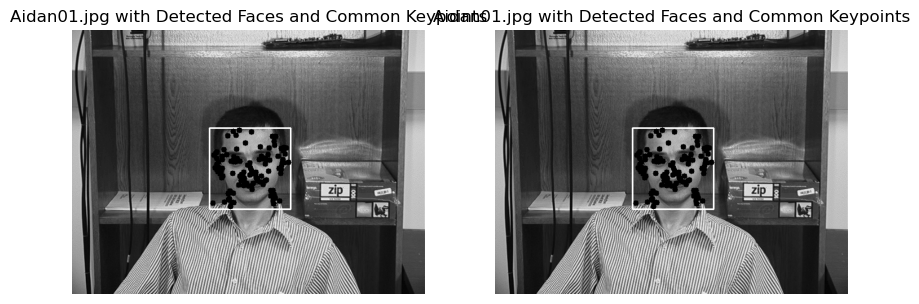

Comparison between Aidan01.jpg and Aidan01.jpg:
Average value of common keypoints: 1.0
-----------------------------------------


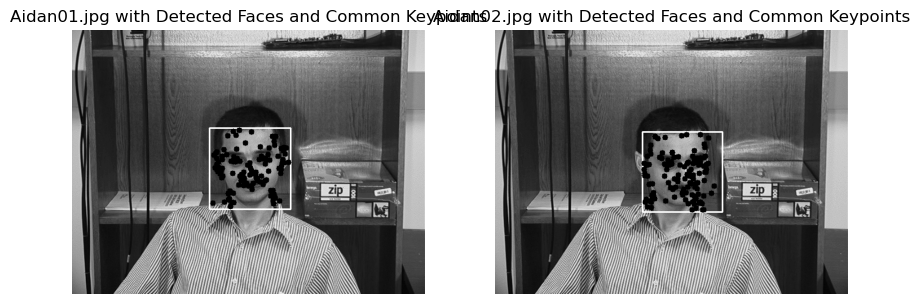

Comparison between Aidan01.jpg and Aidan02.jpg:
Average value of common keypoints: 1.0006613756613756
-----------------------------------------


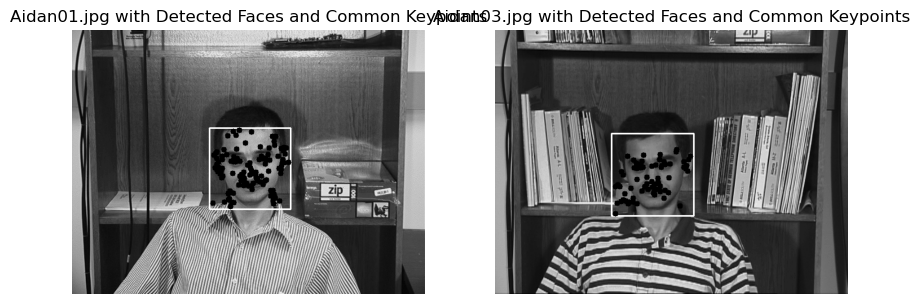

Comparison between Aidan01.jpg and Aidan03.jpg:
Average value of common keypoints: 1.1333333333333333
-----------------------------------------


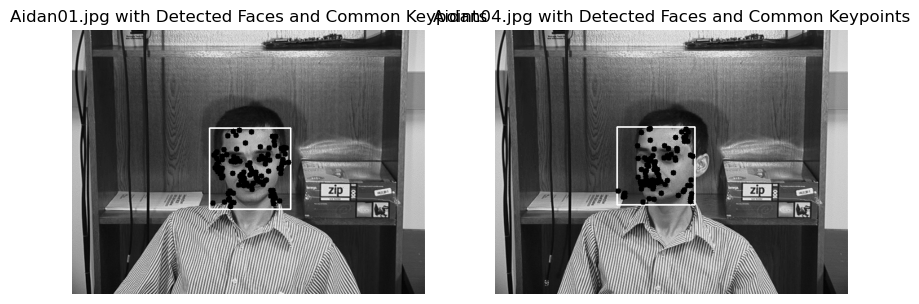

Comparison between Aidan01.jpg and Aidan04.jpg:
Average value of common keypoints: 1.0744363929146539
-----------------------------------------


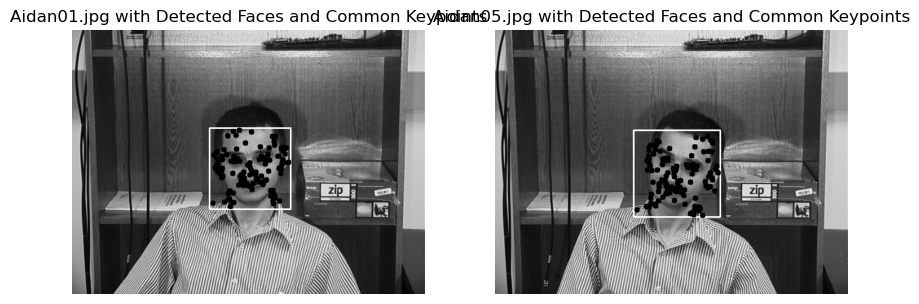

Comparison between Aidan01.jpg and Aidan05.jpg:
Average value of common keypoints: 1.0000272331154685
-----------------------------------------


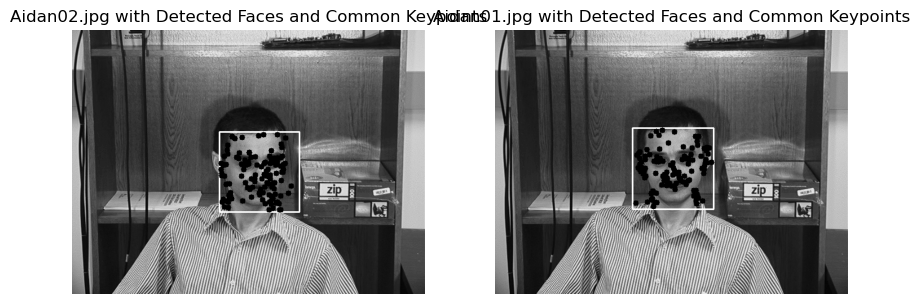

Comparison between Aidan02.jpg and Aidan01.jpg:
Average value of common keypoints: 1.0006613756613756
-----------------------------------------


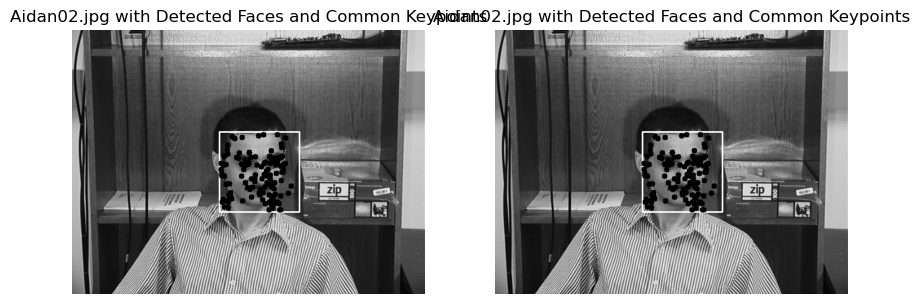

Comparison between Aidan02.jpg and Aidan02.jpg:
Average value of common keypoints: 1.0
-----------------------------------------


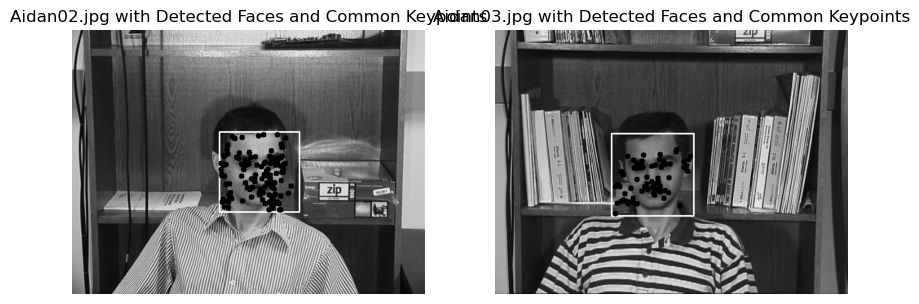

Comparison between Aidan02.jpg and Aidan03.jpg:
Average value of common keypoints: 1.1534832451499117
-----------------------------------------


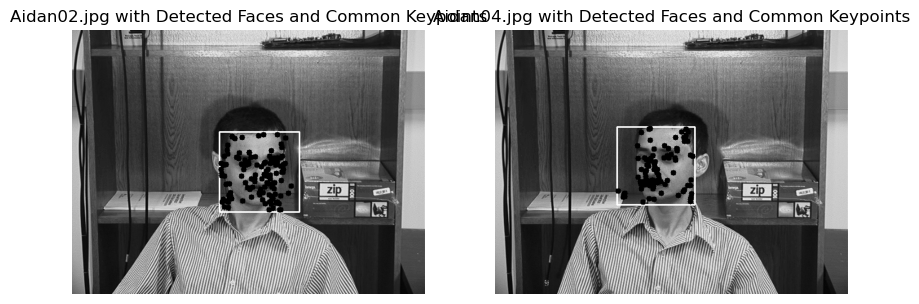

Comparison between Aidan02.jpg and Aidan04.jpg:
Average value of common keypoints: 1.0894409937888199
-----------------------------------------


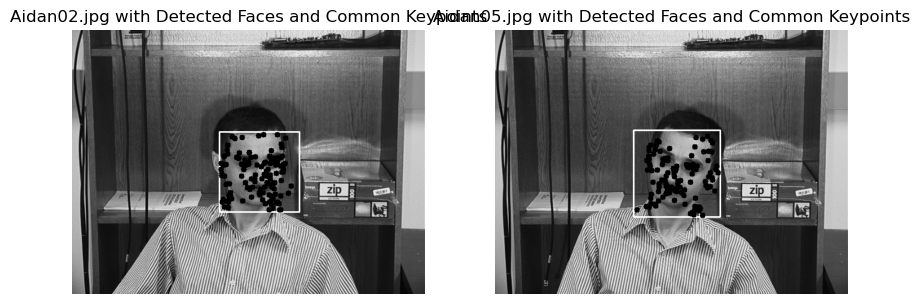

Comparison between Aidan02.jpg and Aidan05.jpg:
Average value of common keypoints: 1.000420168067227
-----------------------------------------


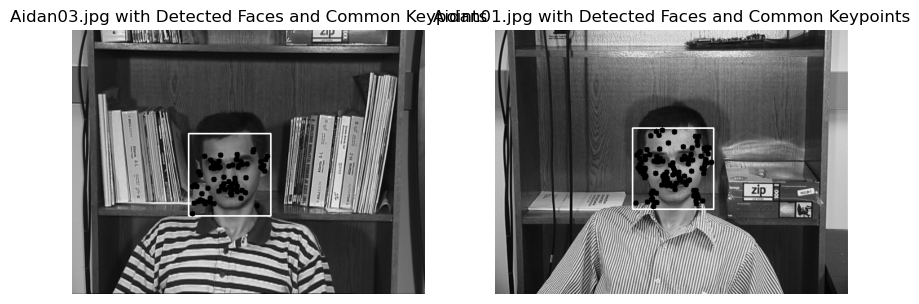

Comparison between Aidan03.jpg and Aidan01.jpg:
Average value of common keypoints: 1.1333333333333333
-----------------------------------------


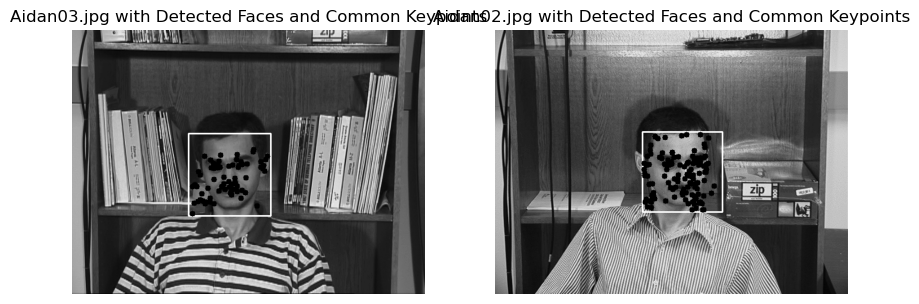

Comparison between Aidan03.jpg and Aidan02.jpg:
Average value of common keypoints: 1.1534832451499117
-----------------------------------------


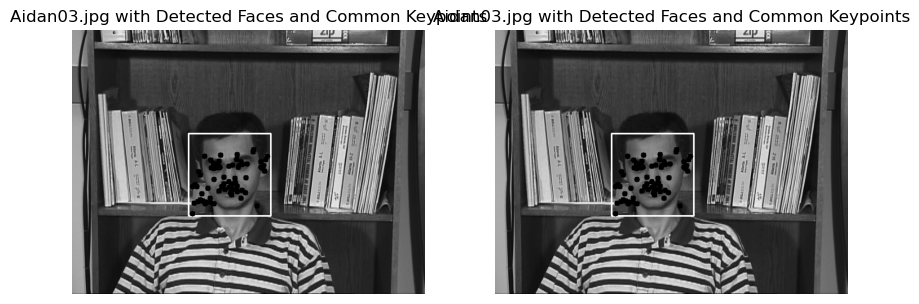

Comparison between Aidan03.jpg and Aidan03.jpg:
Average value of common keypoints: 1.0
-----------------------------------------


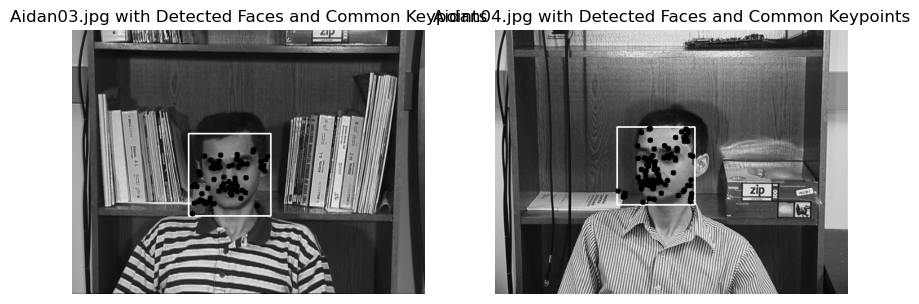

Comparison between Aidan03.jpg and Aidan04.jpg:
Average value of common keypoints: 1.008118625872249
-----------------------------------------


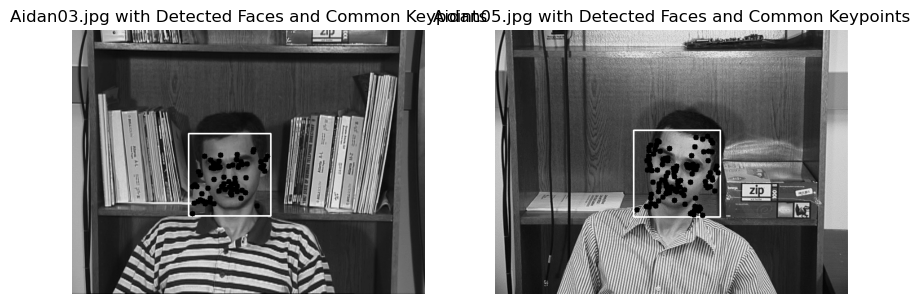

Comparison between Aidan03.jpg and Aidan05.jpg:
Average value of common keypoints: 1.137300290486565
-----------------------------------------


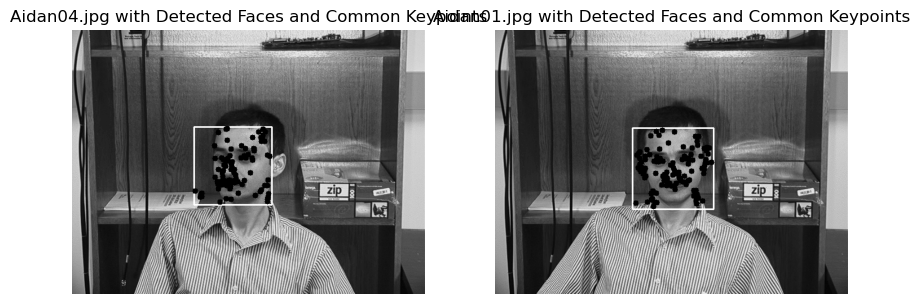

Comparison between Aidan04.jpg and Aidan01.jpg:
Average value of common keypoints: 1.0744363929146539
-----------------------------------------


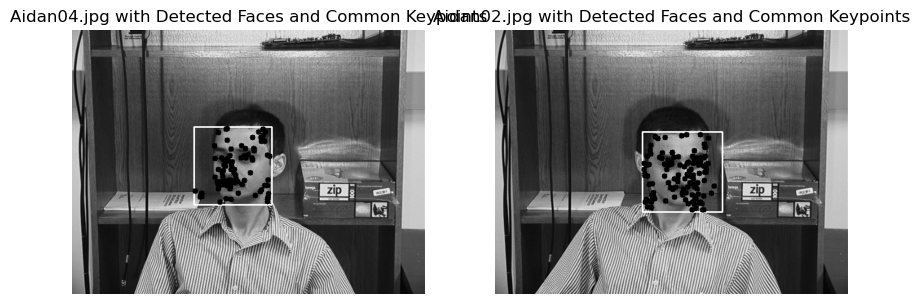

Comparison between Aidan04.jpg and Aidan02.jpg:
Average value of common keypoints: 1.0894409937888199
-----------------------------------------


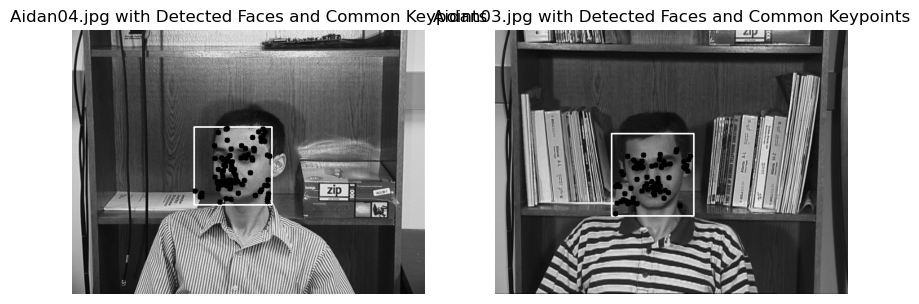

Comparison between Aidan04.jpg and Aidan03.jpg:
Average value of common keypoints: 1.008118625872249
-----------------------------------------


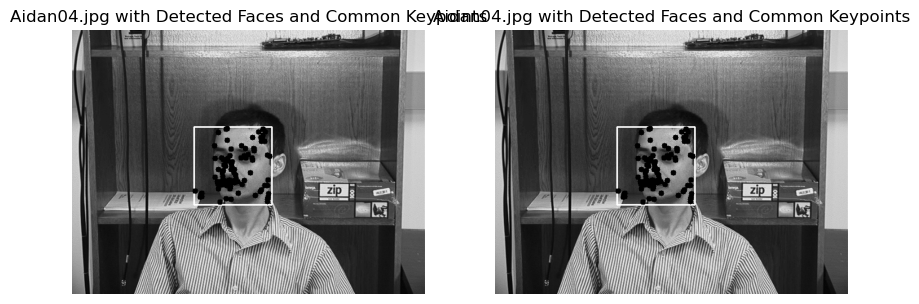

Comparison between Aidan04.jpg and Aidan04.jpg:
Average value of common keypoints: 1.0
-----------------------------------------


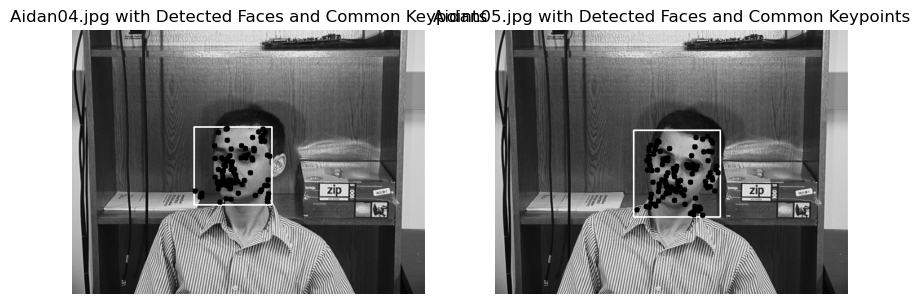

Comparison between Aidan04.jpg and Aidan05.jpg:
Average value of common keypoints: 1.0773657289002556
-----------------------------------------


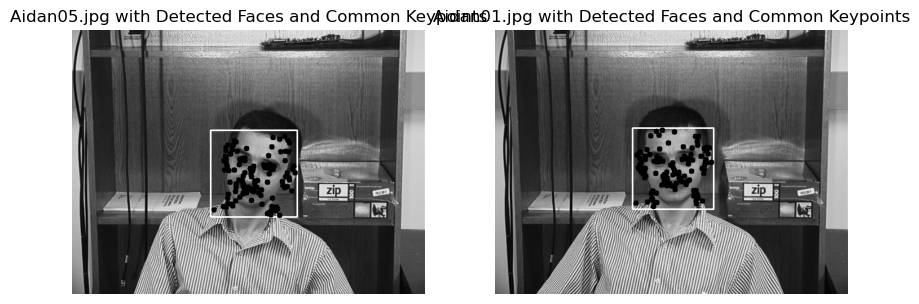

Comparison between Aidan05.jpg and Aidan01.jpg:
Average value of common keypoints: 1.0000272331154685
-----------------------------------------


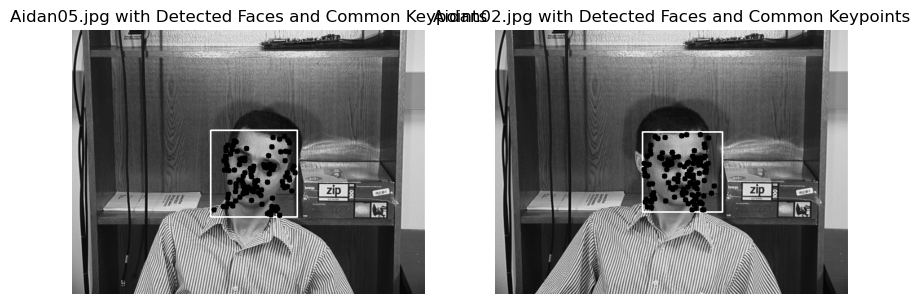

Comparison between Aidan05.jpg and Aidan02.jpg:
Average value of common keypoints: 1.000420168067227
-----------------------------------------


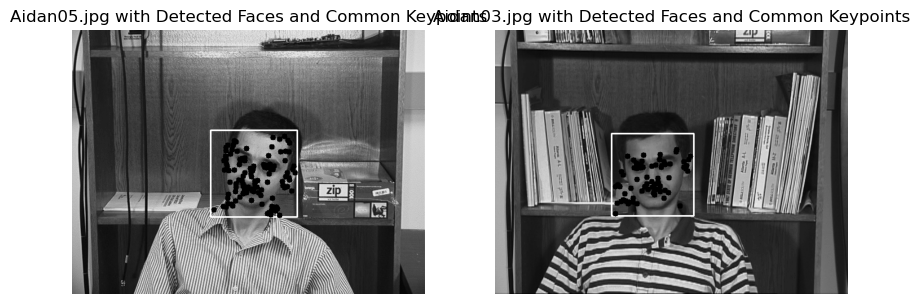

Comparison between Aidan05.jpg and Aidan03.jpg:
Average value of common keypoints: 1.137300290486565
-----------------------------------------


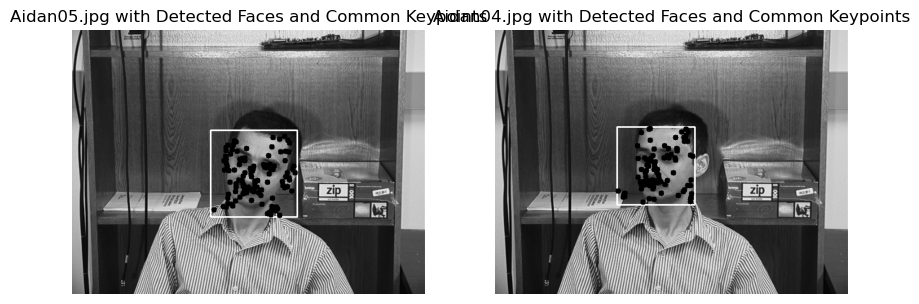

Comparison between Aidan05.jpg and Aidan04.jpg:
Average value of common keypoints: 1.0773657289002556
-----------------------------------------


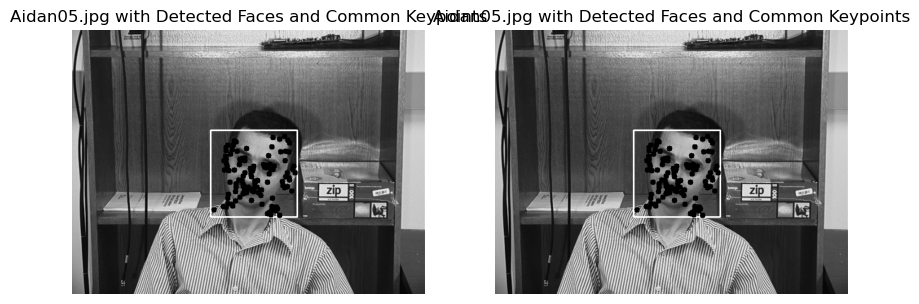

Comparison between Aidan05.jpg and Aidan05.jpg:
Average value of common keypoints: 1.0
-----------------------------------------
Overall average value of common keypoints: 1.0539669909831886


In [50]:
### Testing ###


import cv2
import os
from matplotlib import pyplot as plt

# Load the pre-trained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Initialize SIFT
sift = cv2.SIFT_create()


# Path to the directory containing the training faces
image_dir = r"C:\Users\Ilan\Desktop\Face recognition\gt_db\gt_database 1\gt_database 1\gt_db\Aidan"


# Path to the directory containing the face of a person wishing to enter the system
image_dir2 = r"C:\Users\Ilan\Desktop\Face recognition\gt_db\gt_database 1\gt_database 1\gt_db\Aidan"



# Get a list of all image filenames in the directories
image_files = [file for file in os.listdir(image_dir) if file.endswith('.jpg')]
image_files2 = [file for file in os.listdir(image_dir2) if file.endswith('.jpg')]

# Initialize a list to store the average number of common keypoints for each pair of images
average_common_keypoints = []

# Iterate over each pair of images
for i in range(len(image_files)):
    for j in range(len(image_files2)):
        # The real face from training
        img1 = cv2.imread(os.path.join(image_dir, image_files[i]), cv2.IMREAD_GRAYSCALE)
        # The person wishing to enter
        img2 = cv2.imread(os.path.join(image_dir2, image_files2[j]), cv2.IMREAD_GRAYSCALE)
        
        # The real face from training
        faces1 = face_cascade.detectMultiScale(img1, scaleFactor=1.1, minNeighbors=5)
        # The person wishing to enter
        faces2 = face_cascade.detectMultiScale(img2, scaleFactor=1.1, minNeighbors=5)
        
        # Lists for common keypoints
        common_kp1 = []
        common_kp2 = []
        
        # Extract keypoints and descriptors only within the detected faces for real person
        for (x, y, w, h) in faces1:
            face_roi = img1[y:y+h, x:x+w]
            kp1, des1 = sift.detectAndCompute(face_roi, None)
            common_kp1.extend(kp1)
            cv2.rectangle(img1, (x, y), (x+w, y+h), (255, 0, 0), 2)
            for kp in common_kp1:
                cv2.circle(img1, (int(kp.pt[0]) + x, int(kp.pt[1]) + y), 5, (0, 255, 0), -1)
                
        # Extract keypoints and descriptors only within the detected faces for person wishing to enter
        for (x, y, w, h) in faces2:
            face_roi = img2[y:y+h, x:x+w]
            kp2, des2 = sift.detectAndCompute(face_roi, None)
            common_kp2.extend(kp2)
            cv2.rectangle(img2, (x, y), (x+w, y+h), (255, 0, 0), 2)
            for kp in common_kp2:
                cv2.circle(img2, (int(kp.pt[0]) + x, int(kp.pt[1]) + y), 5, (0, 255, 0), -1)
        
        # Calculate the average number of common keypoints for both lists, the real person, and the one wishing to enter
        if len(common_kp1) != 0 and len(common_kp2) != 0:
            average_keypoints = ((len(common_kp1) / len(common_kp2)) + (len(common_kp2) / len(common_kp1))) / 2
            average_common_keypoints.append(average_keypoints)
            
            
            
            # Display the images with detected faces and common keypoints
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            axes[0].imshow(img1, cmap='gray')
            axes[0].set_title(f'{image_files[i]} with Detected Faces and Common Keypoints')
            axes[0].axis('off')
            
            axes[1].imshow(img2, cmap='gray')
            axes[1].set_title(f'{image_files2[j]} with Detected Faces and Common Keypoints')
            axes[1].axis('off')
            
            plt.show()
            
# Print the results of the comparison
            print(f"Comparison between {image_files[i]} and {image_files2[j]}:")
            print("Average value of common keypoints:", average_keypoints)
            print("-----------------------------------------")

# Check if there were any pairs with common keypoints
if average_common_keypoints:
    # Calculate the average value of each pair of pictures divided by the other
    average_value_test = sum(average_common_keypoints) / len(average_common_keypoints)
    print("Overall average value of common keypoints:", average_value_test)
else:
    print("No common keypoints found.")


In [51]:
print(average_value_real)
print(average_value_test)

if average_value_test > average_value_real:
    print("Access denied")
else:
    print("Access permitted")


1.067458738728986
1.0539669909831886
Access permitted
